In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# The problem statement is to find wheter the customer exited from the bank or not.

In [3]:
df = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


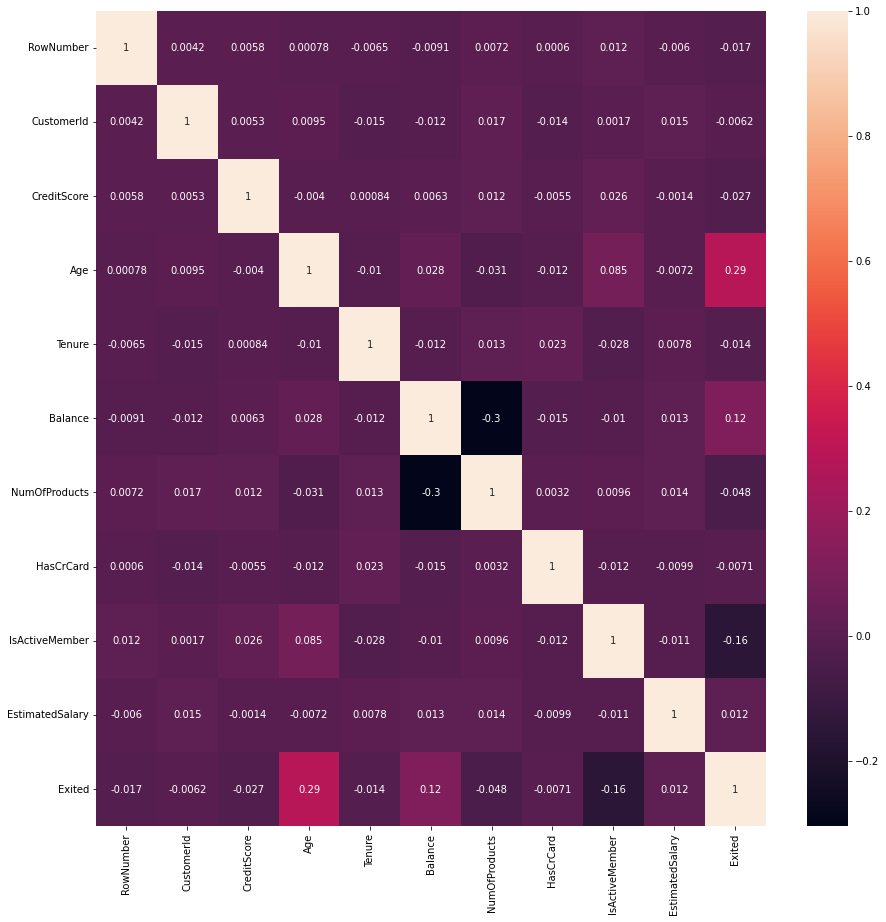

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

In [8]:
# Splitting dataset in X and Y
X = df.iloc[:,3:13].values
Y = df.iloc[:,13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
oHe = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encode',oHe,[1])],remainder='passthrough')

In [10]:
X[:,2] = le.fit_transform(X[:,2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [11]:
X=np.array(ct.fit_transform(X))

In [12]:
X = X[:,1:]

In [13]:
print(X)

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]


## Splitting the dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.582162,-0.576003,-1.118333,0.910489,-0.848398,-0.345883,1.037773,-0.910479,0.644343,-1.035635,1.008864
1,-0.582162,-0.576003,0.176448,0.910489,0.672795,-1.728031,-1.227144,0.811060,-1.551969,-1.035635,-1.219003
2,1.717736,-0.576003,1.201914,-1.098311,-0.373025,0.345192,0.898526,-0.910479,0.644343,-1.035635,0.277175
3,-0.582162,-0.576003,-0.227524,0.910489,-0.753323,0.345192,-1.227144,0.811060,0.644343,-1.035635,-0.099303
4,1.717736,-0.576003,1.264064,-1.098311,0.292497,1.036266,1.221128,0.811060,0.644343,-1.035635,1.252306
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582162,-0.576003,0.849734,0.910489,-0.563174,-0.691420,-1.227144,-0.910479,0.644343,0.965592,-1.596115
7996,-0.582162,-0.576003,-1.698395,-1.098311,-0.468100,-1.036957,0.316151,-0.910479,-1.551969,-1.035635,-1.571492
7997,-0.582162,-0.576003,0.362896,-1.098311,-0.468100,-0.691420,0.765416,0.811060,0.644343,-1.035635,0.836699
7998,-0.582162,-0.576003,-0.144658,0.910489,0.197422,-1.036957,-1.227144,0.811060,-1.551969,0.965592,0.050589


## Building ANN

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

2022-04-07 08:54:47.636197: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-07 08:54:47.800010: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.4885 - accuracy: 0.7937
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4302 - accuracy: 0.7949
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4248 - accuracy: 0.7949
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.8158
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.8255
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4160 - accuracy: 0.8294
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4151 - accuracy: 0.8304
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8305
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.8324
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4112 - accura

In [21]:
y_pred = classifier.predict(x_test)
y_pred= (y_pred>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [False]]


## Validation

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[1555,  261],
       [  49,  135]])

* 1549 True values are correctly predicted true.
* 259 False values are incorreclty predicted True.
* 55 True values are incorrectly predicted False.
* 137 False values are corretly predicted False.

In [24]:
accuracy_score(y_pred,y_test)

0.845

---